In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import string

# Function to convert a row to .dat format
# Function to convert a row to .dat format
def convert_row_to_dat(row, emotion_map):
    sentence = row['Review Sentence']
    words = sentence.split()
    aspect_term = row['Aspect term']
    polarity = row['polarity']
    from_idx = row['from']
    to_idx = row['to']
    emotion_class = row['Emotion Class']

    dat_lines = []
    current_idx = 0

    for word in words:
        clean_word = word.strip(string.punctuation)  # Remove punctuation from the word
        word_start_idx = sentence.find(clean_word, current_idx)
        word_end_idx = word_start_idx + len(clean_word)

        # Determine aspect term tag and polarity tag
        if word_start_idx >= from_idx and word_end_idx <= to_idx:
            aspect_tag = 'B-ASP' if sentence[from_idx:to_idx+1].find(clean_word) == 0 else 'I-ASP'
            polarity_tag = {
                'negative': 0,
                'neutral': 1,
                'positive': 2,
                'conflict': 3,
            }.get(polarity, -1)
            emotion_tag = emotion_map[emotion_class] 
        else:
            aspect_tag = 'O'
            polarity_tag = -1 
            # emotion_tag = emotion_map[emotion_class] 
            emotion_tag = -1


        dat_line = f"{word} {aspect_tag} {polarity_tag} {emotion_tag}"
        # dat_line = f"{word} {aspect_tag} {polarity_tag}"
        dat_lines.append(dat_line)
        current_idx = word_end_idx

    dat_lines.append("")  
    return "\n".join(dat_lines)
def convert_and_save(df, output_dat):
    # Manually specify the mapping of emotion classes to integers
    emotion_map = {
        "Anger": 0,
        "Disgust": 1,
        "Fear": 2,
        "Joy": 3,
        "Sadness": 4,
        "Surprise": 5
    }
    dat_content = df.apply(lambda row: convert_row_to_dat(row, emotion_map), axis=1).str.cat(sep='\n')
    with open(output_dat, 'w') as f:
        f.write(dat_content)
    print(f"Data successfully converted to {output_dat} format.")

In [5]:
# Read the single CSV file
df = pd.read_csv('Annotated ABSA with Emotions Dataset.csv')
df

,id,Review Sentence,Aspect term,polarity,from,to,Anger,Disgust,Fear,Joy,Sadness,Surprise,Emotion Class
0,3121.0,But the staff was so horrible to us.,staff,negative,8,13,4.0,1.0,1.0,0.0,3.0,1.0,Anger
1,2777.0,"To be completely fair, the only redeeming fact...",food,positive,57,61,0.0,0.0,0.0,2.0,0.0,0.0,Joy
2,1634.0,"The food is uniformly exceptional, with a very...",food,positive,4,8,0.0,0.0,0.0,4.0,0.0,0.0,Joy
3,1634.0,"The food is uniformly exceptional, with a very...",kitchen,positive,55,62,0.0,0.0,0.0,4.0,0.0,0.0,Joy
4,1634.0,"The food is uniformly exceptional, with a very...",menu,neutral,141,145,0.0,0.0,0.0,4.0,0.0,0.0,Joy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,NaN,Each table has a pot of boiling water sunken i...,pot of boiling water,neutral,17,37,2.0,2.0,0.0,1.0,0.0,0.0,Anger
4829,NaN,Each table has a pot of boiling water sunken i...,meats,neutral,99,104,0.0,0.0,0.0,3.0,0.0,1.0,Joy
4830,NaN,Each table has a pot of boiling water sunken i...,vegetables,neutral,114,124,0.0,0.0,0.0,2.0,0.0,1.0,Joy
4831,NaN,Each table has a pot of boiling water sunken i...,rice,neutral,130,134,0.0,0.0,0.0,2.0,0.0,1.0,Joy


In [6]:
df['polarity'].value_counts()

polarity
positive    2892
negative    1003
neutral      833
conflict     105
Name: count, dtype: int64

In [7]:
# drop dp row with polarity = conflict
df = df[df['polarity'] != 'conflict']

In [8]:
# count the class of polarity value
df['polarity'].value_counts()

polarity
positive    2892
negative    1003
neutral      833
Name: count, dtype: int64

In [3]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42,shuffle=True)

# Define the target variable for the training data
y_train = train_df['Emotion Class']

# Instantiate the RandomOverSampler
ros = RandomOverSampler()

# Resample the training dataset
X_resampled, y_resampled = ros.fit_resample(train_df, y_train)

# Now, 'X_resampled' is your DataFrame with balanced 'Emotion Class' for the training data

In [7]:
# count the number of emotion class for each value
train_df['Emotion Class'].value_counts()

Emotion Class
Joy         2501
Anger        793
Disgust      291
Surprise     150
Fear          85
Sadness       46
Name: count, dtype: int64

In [11]:
# count the number of emotion class for each value
X_resampled['Emotion Class'].value_counts()

Emotion Class
Joy         2501
Disgust     2501
Surprise    2501
Anger       2501
Sadness     2501
Fear        2501
Name: count, dtype: int64

In [26]:
train_df

,id,Review Sentence,Aspect term,polarity,from,to,Anger,Disgust,Fear,Joy,Sadness,Surprise,Emotion Class
432,1646.0,Highly recommended is the Spicy Fried Clam Rol...,Spider Rolls,positive,53,65,0.0,0.0,0.0,2.0,0.0,0.0,Joy
2948,NaN,You must try Odessa stew or Rabbit stew; salad...,kompot,positive,62,68,0.0,0.0,0.0,3.0,0.0,3.0,Joy
289,1624.0,The only thing more wonderful than the food (w...,food,positive,39,43,0.0,0.0,0.0,4.0,0.0,0.0,Joy
2577,NaN,"I can say that the wraps, burgers and salads w...",mango margareta,positive,75,90,0.0,0.0,0.0,3.0,0.0,3.0,Joy
4108,NaN,The service was friendly(1) and the atmosphere...,service,positive,4,11,0.0,0.0,0.0,2.0,0.0,1.0,Joy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,NaN,"The staff makes you feel at home(1), the food ...",atmosphere,positive,60,70,0.0,0.0,0.0,2.0,0.0,1.0,Joy
466,2872.0,"My wife and I always enjoy the young, not alwa...",staff,conflict,89,94,0.0,0.0,0.0,1.0,0.0,0.0,Joy
3092,NaN,"Fresh veggies, all sorts of middle eastern spr...",spinach thing,positive,127,140,0.0,0.0,0.0,3.0,0.0,3.0,Joy
3772,NaN,"Service was devine(1), oysters where a sensual...",Service,positive,0,7,0.0,0.0,0.0,3.0,0.0,2.0,Joy


In [27]:
X_resampled

,id,Review Sentence,Aspect term,polarity,from,to,Anger,Disgust,Fear,Joy,Sadness,Surprise,Emotion Class
0,1646.0,Highly recommended is the Spicy Fried Clam Rol...,Spider Rolls,positive,53,65,0.0,0.0,0.0,2.0,0.0,0.0,Joy
1,NaN,You must try Odessa stew or Rabbit stew; salad...,kompot,positive,62,68,0.0,0.0,0.0,3.0,0.0,3.0,Joy
2,1624.0,The only thing more wonderful than the food (w...,food,positive,39,43,0.0,0.0,0.0,4.0,0.0,0.0,Joy
3,NaN,"I can say that the wraps, burgers and salads w...",mango margareta,positive,75,90,0.0,0.0,0.0,3.0,0.0,3.0,Joy
4,NaN,The service was friendly(1) and the atmosphere...,service,positive,4,11,0.0,0.0,0.0,2.0,0.0,1.0,Joy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15001,296.0,"They did not have mayonnaise, forgot our toast...",toast,negative,41,46,1.0,1.0,0.0,0.0,1.0,2.0,Surprise
15002,NaN,Did I mention that the coffee is OUTSTANDING?,coffee,positive,23,29,0.0,0.0,0.0,2.0,0.0,3.0,Surprise
15003,NaN,Sit back in one of those comfortable chairs.,chairs,positive,37,43,0.0,0.0,0.0,2.0,0.0,3.0,Surprise
15004,NaN,The menu is interesting(1) and quite reasonabl...,priced,positive,45,51,0.0,0.0,0.0,2.0,0.0,3.0,Surprise


In [12]:
# Convert and save the training and testing data
convert_and_save(X_resampled, 'Restaurants.atepc.train.dat')
convert_and_save(test_df, 'Restaurants.atepc.test.dat')

Data successfully converted to Restaurants.atepc.train.dat format.
Data successfully converted to Restaurants.atepc.test.dat format.


In [9]:
# Calculate the number of rows for training and testing
train_size = int(0.75 * len(df))
test_size = len(df) - train_size

# Split the data into training and testing sets
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

# Convert and save the training and testing data
convert_and_save(train_df, 'Restaurants.atepc.train.dat')
convert_and_save(test_df, 'Restaurants.atepc.test.dat')

Data successfully converted to Restaurants.atepc.train.dat format.
Data successfully converted to Restaurants.atepc.test.dat format.


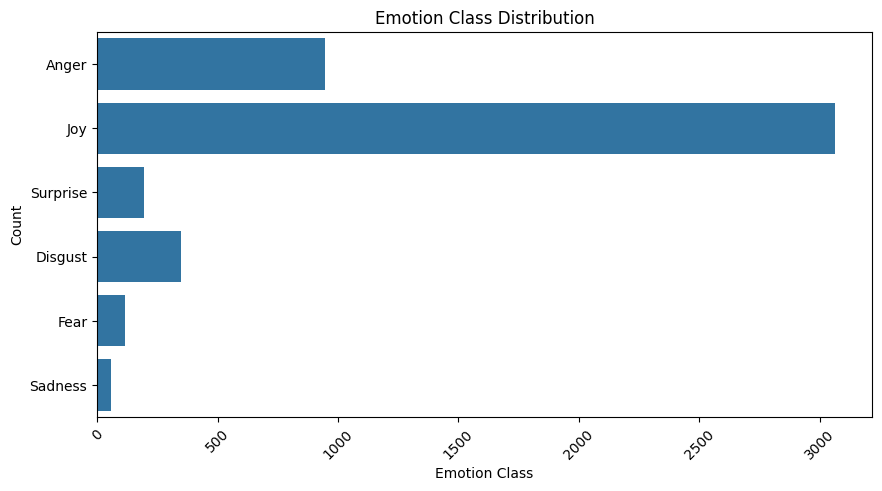

In [10]:
# analyze df dataframe for check for any imbalance dataset and plot it a graph
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.countplot(df['Emotion Class'])
plt.title('Emotion Class Distribution')
plt.xlabel('Emotion Class') 
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


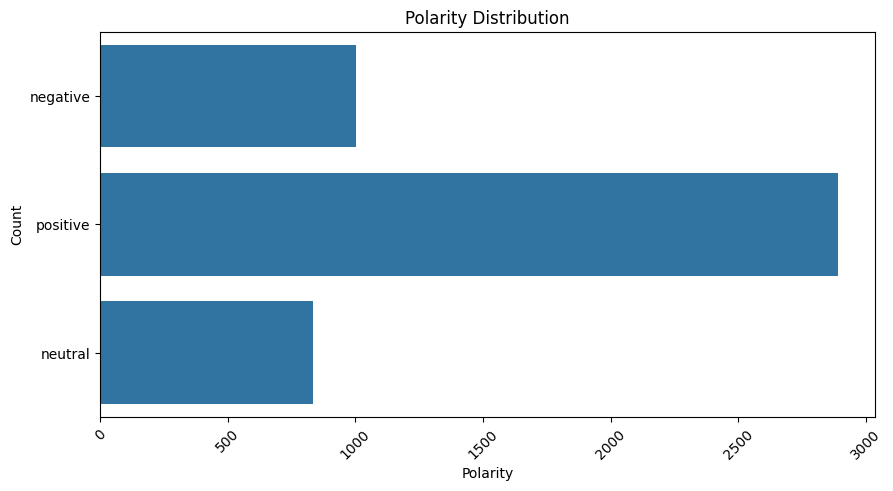

In [11]:
# analyze df dataframe for check for any imbalance for emotion feature column and polarity dataset and plot it a graph  
plt.figure(figsize=(10, 5))
sns.countplot(df['polarity'])   
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [41]:
"""
"Anger": 0
"Disgust": 1
"Fear": 2
"Joy": 3
"Sadness": 4
"Surprise": 5
"""

In [7]:
import pandas as pd
import numpy as np

# Load the .dat file into a DataFrame
dat_train_df = pd.read_csv('atepc_datasets/restaurant/Restaurants.atepc.train.dat', sep=' ', names=['word', 'aspect_tag', 'polarity_tag'])
dat_test_df = pd.read_csv('atepc_datasets/restaurant/Restaurants.atepc.test.dat', sep=' ', names=['word', 'aspect_tag', 'polarity_tag'])

# Add a sentence_id column to dat_df to identify each sentence
dat_train_df['sentence_id'] = (dat_train_df['word'] == '').cumsum()
dat_test_df['sentence_id'] = (dat_test_df['word'] == '').cumsum()

# Load the .csv file into a DataFrame
csv_df = pd.read_csv('Annotated ABSA with Emotions Dataset.csv')

# Calculate the number of rows for training and testing
train_size = int(0.6 * len(csv_df))
test_size = len(csv_df) - train_size

# Split the data into training and testing sets
csv_train_df = csv_df.iloc[:train_size]
csv_test_df = csv_df.iloc[train_size:]



In [12]:
csv_train_df = csv_df.iloc[:train_size].copy()
csv_train_df['sentence_id'] = csv_train_df.groupby('Review Sentence').ngroup()

In [13]:
csv_train_df

,id,Review Sentence,Aspect term,polarity,from,to,Anger,Disgust,Fear,Joy,Sadness,Surprise,Emotion Class,sentence_id
0,3121.0,But the staff was so horrible to us.,staff,negative,8,13,4.0,1.0,1.0,0.0,3.0,1.0,Anger,139
1,2777.0,"To be completely fair, the only redeeming fact...",food,positive,57,61,0.0,0.0,0.0,2.0,0.0,0.0,Joy,1320
2,1634.0,"The food is uniformly exceptional, with a very...",food,positive,4,8,0.0,0.0,0.0,4.0,0.0,0.0,Joy,958
3,1634.0,"The food is uniformly exceptional, with a very...",kitchen,positive,55,62,0.0,0.0,0.0,4.0,0.0,0.0,Joy,958
4,1634.0,"The food is uniformly exceptional, with a very...",menu,neutral,141,145,0.0,0.0,0.0,4.0,0.0,0.0,Joy,958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,NaN,"Great(1) beer selection too, something like 50...",beers,neutral,44,49,0.0,0.0,0.0,3.0,0.0,2.0,Joy,316
2895,NaN,Not to sound too negative but be wary of the d...,delivary,negative,45,53,2.0,1.0,0.0,0.0,2.0,0.0,Anger,674
2896,NaN,I found the food to be just as good as its(1) ...,food,positive,12,16,0.0,0.0,0.0,2.0,0.0,2.0,Joy,388
2897,NaN,I found the food to be just as good as its(1) ...,owner,positive,43,48,0.0,0.0,0.0,3.0,0.0,2.0,Joy,388


In [19]:

csv_test_df['sentence_id'] = csv_test_df.groupby('Review Sentence').ngroup()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16932\120186871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv_test_df['sentence_id'] = csv_test_df.groupby('Review Sentence').ngroup()


In [20]:
# Merge the training DataFrames on the common key
merged_train_df = pd.merge(dat_train_df, csv_train_df, on='sentence_id')

# Assign the emotion of the sentence to the words that have an aspect tag in the training set
merged_train_df.loc[merged_train_df['aspect_tag'] != 'O', 'emotion_tag'] = merged_train_df['Emotion Class']

# Replace NaN values in the 'emotion_tag' column with -1 in the training set
merged_train_df['emotion_tag'].fillna(-1, inplace=True)

# Save the merged training DataFrame back to a .dat file
merged_train_df.to_csv('merged_train_dataset.dat', sep=' ', index=False, header=False, columns=['word', 'aspect_tag', 'polarity_tag', 'emotion_tag'])

# Merge the testing DataFrames on the common key
merged_test_df = pd.merge(dat_test_df, csv_test_df, on='sentence_id')

# Assign the emotion of the sentence to the words that have an aspect tag in the testing set
merged_test_df.loc[merged_test_df['aspect_tag'] != 'O', 'emotion_tag'] = merged_test_df['Emotion Class']

# Replace NaN values in the 'emotion_tag' column with -1 in the testing set
merged_test_df['emotion_tag'].fillna(-1, inplace=True)

# Save the merged testing DataFrame back to a .dat file
merged_test_df.to_csv('merged_test_dataset.dat', sep=' ', index=False, header=False, columns=['word', 'aspect_tag', 'polarity_tag', 'emotion_tag'])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16932\2181462802.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_train_df['emotion_tag'].fillna(-1, inplace=True)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16932\2181462802.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [26]:
df1 = pd.read_csv('merged_train_dataset.dat', sep=' ', names=['word', 'aspect_tag', 'polarity_tag','emotion_tag'])
df1

,word,aspect_tag,polarity_tag,emotion_tag
0,But,O,-1,-1
1,But,O,-1,-1
2,But,O,-1,-1
3,But,O,-1,-1
4,the,O,-1,-1
...,...,...,...,...
288739,food,B-ASP,2,Anger
288740,.,O,-1,-1
288741,.,O,-1,-1
288742,.,O,-1,-1


In [27]:
# remove any duplicate column
df1.drop_duplicates()

,word,aspect_tag,polarity_tag,emotion_tag
0,But,O,-1,-1
4,the,O,-1,-1
8,staff,B-ASP,0,Anger
12,was,O,-1,-1
16,so,O,-1,-1
...,...,...,...,...
288064,sake,I-ASP,-1,Anger
288084,edamames,B-ASP,1,Anger
288208,plate,I-ASP,1,Anger
288368,sticks,I-ASP,1,Anger


In [24]:
df2 = pd.read_csv('merged_test_dataset.dat', sep=' ', names=['word', 'aspect_tag', 'polarity_tag','emotion_tag'])
df2

,word,aspect_tag,polarity_tag,emotion_tag
0,The,O,-1,-1
1,The,O,-1,-1
2,The,O,-1,-1
3,The,O,-1,-1
4,The,O,-1,-1
...,...,...,...,...
127549,.,O,-1,-1
127550,.,O,-1,-1
127551,.,O,-1,-1
127552,.,O,-1,-1


In [25]:
df2.drop_duplicates()

,word,aspect_tag,polarity_tag,emotion_tag
0,The,O,-1,-1
6,bread,B-ASP,2,Anger
12,is,O,-1,-1
18,top,O,-1,-1
24,notch,O,-1,-1
...,...,...,...,...
127074,appetizers,I-ASP,-1,Anger
127212,warm,B-ASP,1,Anger
127218,pitas,I-ASP,1,Anger
127248,taramasalata,B-ASP,2,Anger


In [33]:
df3_test =df2.replace(["Anger","Disgust","Fear","Joy", "Sadness","Surprise",],[0,1,2,3,4,5])

In [38]:
df3_test=df3_test.drop_duplicates()

In [36]:
df3_train =df1.replace(["Anger","Disgust","Fear","Joy", "Sadness","Surprise",],[0,1,2,3,4,5])

In [39]:
df3_train= df3_train.drop_duplicates()

In [41]:
df3_train

,word,aspect_tag,polarity_tag,emotion_tag
0,But,O,-1,-1
4,the,O,-1,-1
8,staff,B-ASP,0,0
12,was,O,-1,-1
16,so,O,-1,-1
...,...,...,...,...
288064,sake,I-ASP,-1,0
288084,edamames,B-ASP,1,0
288208,plate,I-ASP,1,0
288368,sticks,I-ASP,1,0


In [42]:
df3_test

,word,aspect_tag,polarity_tag,emotion_tag
0,The,O,-1,-1
6,bread,B-ASP,2,0
12,is,O,-1,-1
18,top,O,-1,-1
24,notch,O,-1,-1
...,...,...,...,...
127074,appetizers,I-ASP,-1,0
127212,warm,B-ASP,1,0
127218,pitas,I-ASP,1,0
127248,taramasalata,B-ASP,2,0


In [ ]:
# save train
df3_train.to_csv('Restaurants.atepc.train.dat', sep=' ', index=False, header=False, columns=['word', 'aspect_tag', 'polarity_tag', 'emotion_tag'])

In [40]:
# save train
df3_test.to_csv('Restaurants.atepc.test.dat', sep=' ', index=False, header=False, columns=['word', 'aspect_tag', 'polarity_tag', 'emotion_tag'])